In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


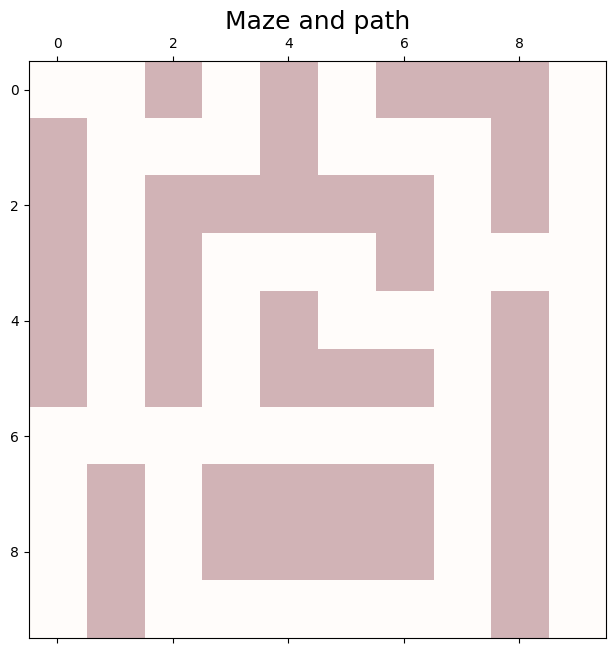

Made EGreedy
904
1712
596
548
402
814
916
536
476
348
1510
422
1442
1284
Made EGreedy
578
2452
1698
570
692
544
380
270
1730
1868
462
294
944
664
Made EGreedy
278
242
588
936
824
1354
1704
1470
1166
3940
646
1154
160
846
Made EGreedy
748
398
270
1970
1892
1438
634
1654
832
1902
488
328
6262
462
Made EGreedy
414
1712
2492
1000
1082
316
362
368
578
526
2568
1298
242
556
Made EGreedy
1230
1362
818
280
942
582
832
430
1640
1526
634
802
344
954
Made EGreedy
478
2150
1594
246
1840
148
130
980
696
2202
1972
1898
1018
540
Made EGreedy
1346
564
2366
1304
1044
212
1960
2864
1698
284
214
378
294
342
Made EGreedy
2564
1150
286
1122
554
596
1608
3772
538
1006
524
2080
244
1082
Made EGreedy
396
6468
162
804
148
1552
616
440
1276
1152
176
1086
1642
908


In [61]:
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
maze.set_reward(maze.get_state(9, 9), 10)

steps_per_iter = dict()
lines_per_run = dict()

for i in range(10):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 1

    eps = 0.1

    stop = False
    iter = 30000

    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        if robot.get_state(maze).x  == 9 and robot.get_state(maze).y == 9:
            if episode not in steps_per_iter:
                steps_per_iter[episode] = 0
                lines_per_run[episode] = 0
            steps_per_iter[episode] += robot.nr_of_actions_since_reset
            lines_per_run[episode] += 1
            episode += 1
            if episode == 16:
                break
            robot.reset()
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        #print(current_action, robot.get_state(maze))
        
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        alfa = 0.7
        gamma = 0.9

        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        iter -= 1
        if iter == 0:
            break
        #robot.do_action(action=current_action, maze=maze)
        # TODO implement the action selection and learning cycle
        # TODO figure out a stopping criterion

[893.6, 1821.0, 1087.0, 878.0, 942.0, 755.6, 914.2, 1278.4, 1063.0, 1475.4, 919.4, 974.0, 1259.2, 763.8, 1351.6]


(0.0, 3000.0)

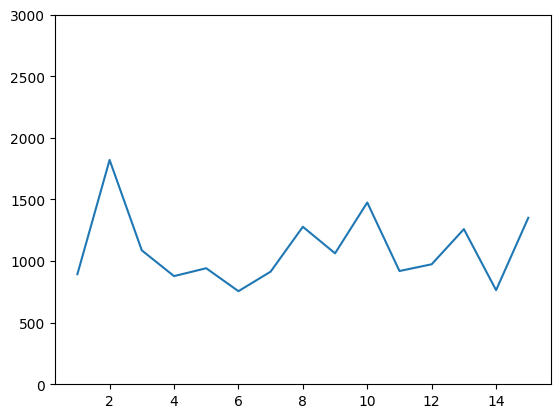

In [68]:
import matplotlib.pyplot as plt
import numpy as np

#print(steps_per_iter)

x = np.array(steps_per_iter.keys())
y = np.array(list(steps_per_iter.values())) / np.array(list(lines_per_run.values()))

print(y.tolist())
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 3000)